# MOOC Python Challenge Leila O'Brien

In [64]:
pip install numpy scipy matplotlib ipython jupyter pandas sympy nose seaborn

In [74]:
#Task 1- Use Pandas to read in the sales data from the CSV file provided in the “student materials” folder on Slack (sales_dataset.csv)
#Import pandas for data analysis
#Import numpy to to work with numerical data
#Import seaborn and matplotlib to create graphs

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib notebook


In [75]:
#Task 1
#When the df is printed the customer name appeared below the rest of the table so I expanded the output display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [76]:
#Task 1
#Import and open csv file
import pandas
df = pandas.read_csv(r"C:\Users\leila\OneDrive\FromYourPhone\Documents\Python MOOC\sales_dataset.csv")
print(df)

                Product Name     Category  Sale Price  Quantity Sold      Month    Customer Name
0                   T-shirts     Clothing       10.99             20   December       John Smith
1               Levi's Jeans     Clothing       59.99             18      April   Samantha Davis
2               Dyson Vacuum         Home      599.99              2     August   David Williams
3                 Sunglasses  Accessories       21.22             15        May   Kelly Williams
4                 Headphones  Electronics        8.99             40    October      Chris Brown
5              Water bottles  Accessories       14.14             22     August          Amy Lee
6                  Backpacks  Accessories       18.99             27       July    William Smith
7                       Hats  Accessories       29.99             35  September      Emily Davis
8                      Books        Media       11.99             18      March   Robert Johnson
9                       Toys  

In [77]:
#Task 2- Calculate the total sales for each product 

#Assign a new variable called 'total_product_sales' to record the total sales price for product
#Multiply 'Sale Price' by 'Quantity Sold' using *

total_product_sales = df['Sale Price'] * df['Quantity Sold']
print(total_product_sales)

0      219.80
1     1079.82
2     1199.98
3      318.30
4      359.60
5      311.08
6      512.73
7     1049.65
8      215.82
9      521.71
10     351.68
11    2975.76
12    4499.95
13    3899.97
14    1349.85
15      83.98
16      66.31
17    1599.96
18    1799.88
19    1349.91
20     399.75
21     301.00
22    1499.94
23    1999.96
24    2799.92
25    1299.90
26     899.70
27     799.80
28     719.94
29    1499.97
30     799.96
31     799.98
32     799.99
dtype: float64


In [78]:
#Task 2
# I created a revised version of the df called product_sales and added a column to the table to show the total_product_sales
#I removed the index from the table results because this affected the way the data was presented

product_sales = df.assign(total_product_sales = df['Sale Price'] * df['Quantity Sold'])
print(product_sales.to_string(index=False))

            Product Name    Category  Sale Price  Quantity Sold     Month   Customer Name  total_product_sales
                T-shirts    Clothing       10.99             20  December      John Smith               219.80
            Levi's Jeans    Clothing       59.99             18     April  Samantha Davis              1079.82
            Dyson Vacuum        Home      599.99              2    August  David Williams              1199.98
              Sunglasses Accessories       21.22             15       May  Kelly Williams               318.30
              Headphones Electronics        8.99             40   October     Chris Brown               359.60
           Water bottles Accessories       14.14             22    August         Amy Lee               311.08
               Backpacks Accessories       18.99             27      July   William Smith               512.73
                    Hats Accessories       29.99             35 September     Emily Davis              1049.65
 

In [79]:
#Task 3- Determine the average sale price for each product category 
#To find average: add total sales for each catergory (.sum) and divide by quantity sold (.div)

#I changed the column name
product_sales = product_sales.rename(columns={'total_product_sales': 'total_category_sales'})

#Next, I created the variable category_sales
#I grouped by category and found the total category sales
category_sales= pd.DataFrame(product_sales.groupby(['Category']).sum().sort_values('total_category_sales'))
#Printed data showed 'Sale Price' category which made reading results confusing so I omitted it
del category_sales['Sale Price']
print(category_sales)

             Quantity Sold  total_category_sales
Category                                        
Home decor              21                150.29
Food                    32                351.68
Toys                    29                521.71
Media                   43                615.57
Kitchen                 14               2099.86
Clothing                74               2919.26
Outdoor                 24               2975.76
Home                    10               3499.90
Fitness                 27               4199.73
Accessories            119               6791.56
Electronics            102              14260.23


In [80]:
#Task 3
#After finding the total_category_sales for each category, I found the avaerage_category_sales by dividing the 'total_category_sales' column by the 'Quantity Sold' column.
category_sales['average_category_sales'] = category_sales['total_category_sales'].div(category_sales['Quantity Sold'])
#Print results to two decimal places
print(category_sales.round(2))

             Quantity Sold  total_category_sales  average_category_sales
Category                                                                
Home decor              21                150.29                    7.16
Food                    32                351.68                   10.99
Toys                    29                521.71                   17.99
Media                   43                615.57                   14.32
Kitchen                 14               2099.86                  149.99
Clothing                74               2919.26                   39.45
Outdoor                 24               2975.76                  123.99
Home                    10               3499.90                  349.99
Fitness                 27               4199.73                  155.55
Accessories            119               6791.56                   57.07
Electronics            102              14260.23                  139.81


In [81]:
#Task 4- Identify the month with the highest sales and the month with the lowest sales
#Create new variable 'monthly_sales'- group results by month and find the sum of each month
monthly_sales= pd.DataFrame(product_sales.groupby(['Month']).sum().sort_values('Month'))
#Rename 'total_category_sales' to 'total_monthly sales'
monthly_sales = monthly_sales.rename(columns={'total_category_sales': 'total_monthly_sales'})
#Delete columns so table is clearer to read
del monthly_sales['Sale Price']
del monthly_sales['Quantity Sold']
#Display results in descending order
monthly_sales.sort_values('total_monthly_sales', ascending=False)

,total_monthly_sales
Month,
February,6499.66
December,6341.14
July,5112.53
November,5042.03
September,3899.53
April,3229.65
August,2395.03
March,2315.52
June,1851.62


<IPython.core.display.Javascript object>


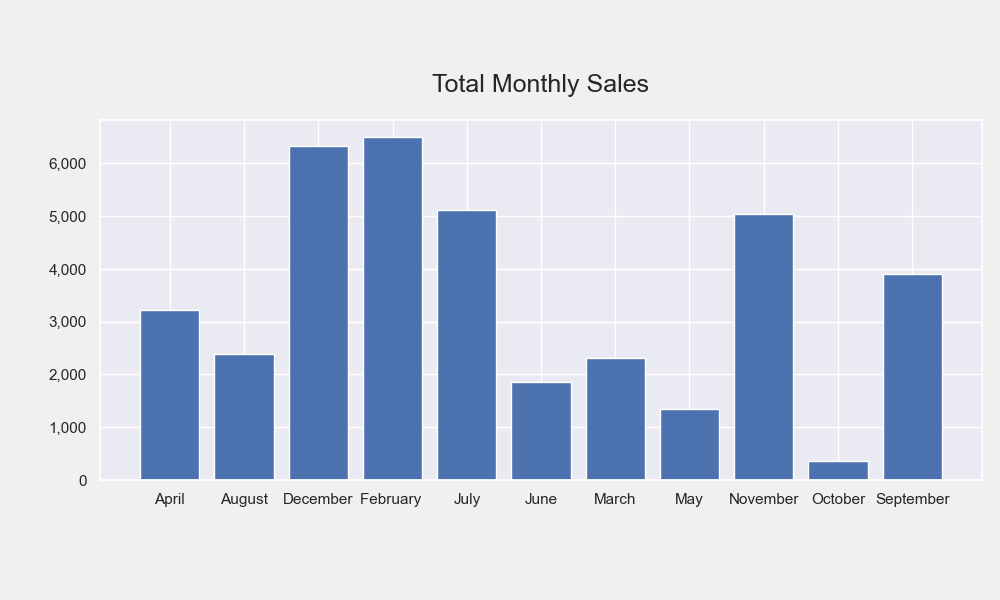

In [94]:
# Optional extras:
#Use Matplotlib or Seaborn to create detailed graphs of the sales data

# I used 'https://sharkcoder.com/data-visualization/mpl-bar-chart' to support me to creat a graph of monthly sales
index = monthly_sales.index
values = monthly_sales['total_monthly_sales']
plot_title = 'Total Monthly Sales'
title_size = 18
y_label = 'total_monthly_sales'
y_label = 'Total Sales'
filename = 'bar-plot'

fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()
    
bar = ax.bar(index, values)
plt.tight_layout()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

title = plt.title(plot_title, pad=20, fontsize=title_size)
plt.subplots_adjust(top=0.8, bottom=0.2, left=0.1)
    
ax.grid(zorder=0)

In [90]:
#Task 4
#Month with highest sales
print(monthly_sales.idxmax())
#Month with lowest sales
print(monthly_sales.idxmin())

total_monthly_sales    February 
dtype: object
total_monthly_sales    October
dtype: object


In [91]:
#Task 5- Determine which customers made the most purchases and how much they spent in total
#Create new variable 'mothly_sales'
#Group by 'Customer Name' and find the total quantiy sold and sum of sales
customer_sales= pd.DataFrame(product_sales.groupby(['Customer Name']).sum().sort_values('total_category_sales'))
#Rename 'total_category_sales' to 'total_customer_sales'
customer_sales = customer_sales.rename(columns={'total_category_sales': 'total_customer_sales'})
#Delete column so table is clearer to read
del customer_sales['Sale Price']
#Display results in descending order
customer_sales.sort_values('Quantity Sold', ascending=False)

,Quantity Sold,total_customer_sales
Customer Name,,
Emily Davis,55,1849.45
Amy Lee,52,1210.78
Chris Brown,50,1659.50
John Smith,49,2619.51
Samantha Davis,46,4855.54
Michael Johnson,44,3201.56
Kimberly White,41,2321.59
Kelly Williams,30,1668.15
Robert Johnson,28,2535.72


In [12]:
#Task 5- Top 5 highest purchasing customers with total quantity sold
customer_sales.sort_values(by=['Quantity Sold'], ascending=False).head(5)

,Quantity Sold,total_customer_sales
Customer Name,,
Emily Davis,55,1849.45
Amy Lee,52,1210.78
Chris Brown,50,1659.50
John Smith,49,2619.51
Samantha Davis,46,4855.54


In [1]:
#Write the results of your analysis as a CSV file
